# FeedForward 🥸

#### Libriaries

In [1]:
import utilities as ff
from matplotlib import pyplot as plt
import numpy as np
import pathlib


In [2]:
import tensorflow as tf
from tensorflow import keras

from keras.layers import *
from keras.models import *
from keras.losses import *
from keras.optimizers import *
from keras.utils import *


#### Dataset

In [3]:
batch_size=1
img_width, img_height=100,100
color_mode='grayscale'
no_classes = 2
seed=123

In [4]:
train, test = ff.ready_to_be_used_dataset(
    batch_size, image_squared_size=img_width, color_mode=color_mode
)


Found 23401 files belonging to 2 classes.
Using 18721 files for training.
Found 23401 files belonging to 2 classes.
Using 4680 files for validation.


In [5]:
image_batch, labels_batch = next(iter(train))
print(image_batch.shape, labels_batch.shape)


(42, 100, 100, 1) (42,)


In [6]:
data_dir = pathlib.Path("downloads\CatsDogs")

In [7]:
ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    color_mode=color_mode,
    image_size=(img_height, img_width),
    batch_size=batch_size,
)

Found 23401 files belonging to 2 classes.


### Naive model

#### Model definition

In [6]:
model = Sequential(
    [
        
        Flatten(input_shape=(100, 100, 1)),
        Dense(100, activation="relu"),
        Dense(2, activation="softmax"),
    ]
)
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 10000)             0         
                                                                 
 dense (Dense)               (None, 100)               1000100   
                                                                 
 dense_1 (Dense)             (None, 2)                 202       
                                                                 
Total params: 1,000,302
Trainable params: 1,000,302
Non-trainable params: 0
_________________________________________________________________


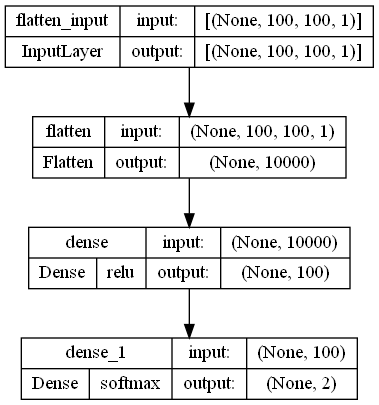

In [7]:
plot_model(
    model,
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=True,
)


In [8]:
model.compile(
    optimizer=Adam(),
    loss=SparseCategoricalCrossentropy(),
    metrics=["accuracy"],
)


#### Hyperparameters tuning

In [10]:
history = model.fit(train, validation_data=test, epochs=5)


Epoch 1/5
446/446 [==============================] - 28s 63ms/step - loss: 0.6631 - accuracy: 0.5906 - val_loss: 0.6625 - val_accuracy: 0.6094
Epoch 2/5
446/446 [==============================] - 30s 67ms/step - loss: 0.6584 - accuracy: 0.6074 - val_loss: 0.6720 - val_accuracy: 0.5784
Epoch 3/5
446/446 [==============================] - 25s 56ms/step - loss: 0.6561 - accuracy: 0.6084 - val_loss: 0.6578 - val_accuracy: 0.6088
Epoch 4/5
446/446 [==============================] - 26s 57ms/step - loss: 0.6545 - accuracy: 0.6100 - val_loss: 0.6607 - val_accuracy: 0.6092
Epoch 5/5
446/446 [==============================] - 25s 56ms/step - loss: 0.6540 - accuracy: 0.6135 - val_loss: 0.6579 - val_accuracy: 0.5981


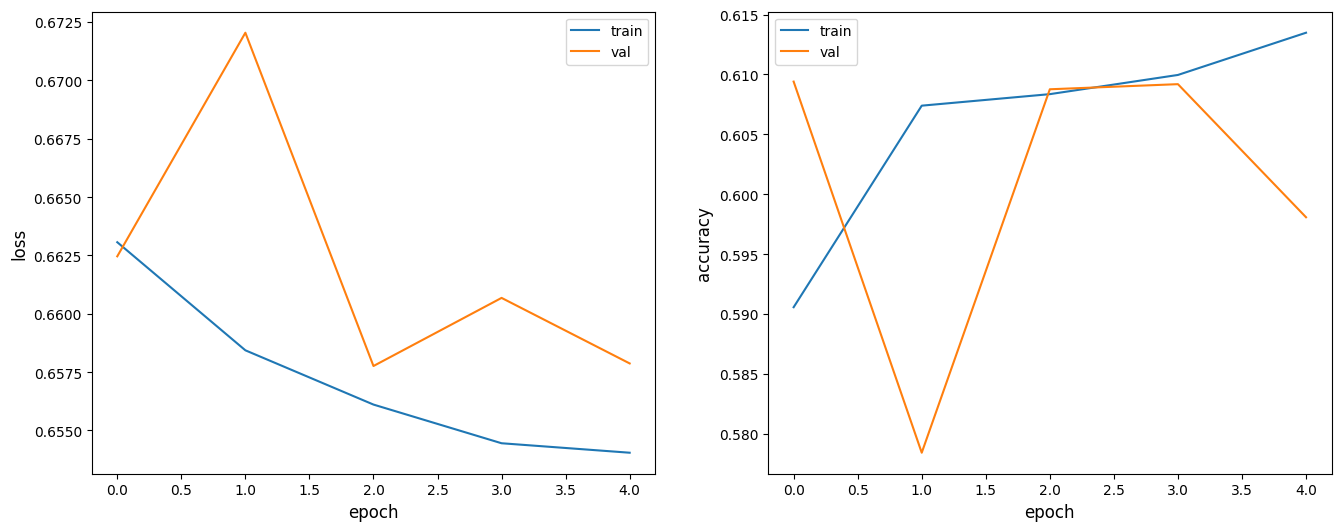

In [11]:
ff.performance_plot(history)


#### Risk estimation

In [8]:
def_model= Sequential(
    [
        
        Flatten(input_shape=(100, 100, 1)),
        Dense(100, activation="relu"),
        Dense(2, activation="softmax"),
    ]
)

In [11]:
ff.five_fold_cross_validation(def_model,ds,no_epochs=5)

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/5
18720/18720 [==============================] - 170s 9ms/step - loss: 19.7463 - accuracy: 0.4999
Epoch 2/5
18720/18720 [==============================] - 125s 7ms/step - loss: 0.6935 - accuracy: 0.4996
Epoch 3/5
18720/18720 [==============================] - 132s 7ms/step - loss: 0.6934 - accuracy: 0.5050
Epoch 4/5
18720/18720 [==============================] - 130s 7ms/step - loss: 0.6934 - accuracy: 0.4997
Epoch 5/5
18720/18720 [==============================] - 155s 8ms/step - loss: 0.6934 - accuracy: 0.4951
Score for fold 1: loss of 0.6936279535293579; accuracy of 50.50203204154968%
------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/5
18721/18721 [==============================] - 153s 8ms/step - loss: 0.6934 - accuracy: 0.5015
Epoch 2/5
18721/18721 [==============================] - 125s 7ms/step - loss: 0.6935 - accuracy: 

### Many neurons model

#### Model definition

In [ ]:
model = tf.keras.Sequential(
    [
        Flatten(input_shape=(100, 100, 3)),
        Dense(2000, activation="relu"),
        Dense(2, activation="softmax"),
    ]
)
model.summary()


In [ ]:
plot_model(
    model,
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=True,
)


In [ ]:
model.compile(
    optimizer=Adam(),
    loss=SparseCategoricalCrossentropy(),
    metrics=["accuracy"],
)


#### Training

In [ ]:
history = model.fit(train, validation_data=test, epochs=5)


#### Performance evaluation

In [ ]:
ff.performance_plot(history)


### Many layers model

#### Model definition

In [ ]:
model = Sequential(
    [
        Flatten(input_shape=(100, 100, 3)),
        Dense(1500, activation="relu"),
        Dense(500, activation="relu"),
        Dense(2, activation="softmax"),
    ]
)
model.summary()


In [ ]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=True,
)


In [ ]:
model.compile(
    optimizer=Adam(),
    loss=SparseCategoricalCrossentropy(),
    metrics=["accuracy"],
)


#### Training

In [ ]:
history = model.fit(train, validation_data=test, epochs=5)


#### Performance evaluation

In [ ]:
ff.performance_plot(history)
